<a href="https://colab.research.google.com/github/melissajblins/PDI/blob/main/Atividade3PDI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Universidade Federal do ABC
## Processamento Digital de Imagens - Avaliação 3 
Melissa Junqueira de Barros Lins

11201920583

## Caderno Colab
https://colab.research.google.com/drive/1XHQP7MKVwIvx6uaA1nu9eYg02Knv0X6b?usp=sharing

## Vídeo explicativo
https://drive.google.com/file/d/18kW6rCOOdNl704VBqrb9bi_475wB49wP/view?usp=sharing


## Sobre
Quando a imagem tiver objetos geométricos, incluir em seu interior a área (número de pixels) e escrever o tipo do objeto. Função ```cv2.findContours```.

## Referências
https://gist.github.com/pknowledge/1ac15006bb1d86350fc8e5c47d324f64



In [ ]:
## Importando bibliotecas
import numpy as np
import cv2 
from google.colab.patches import cv2_imshow

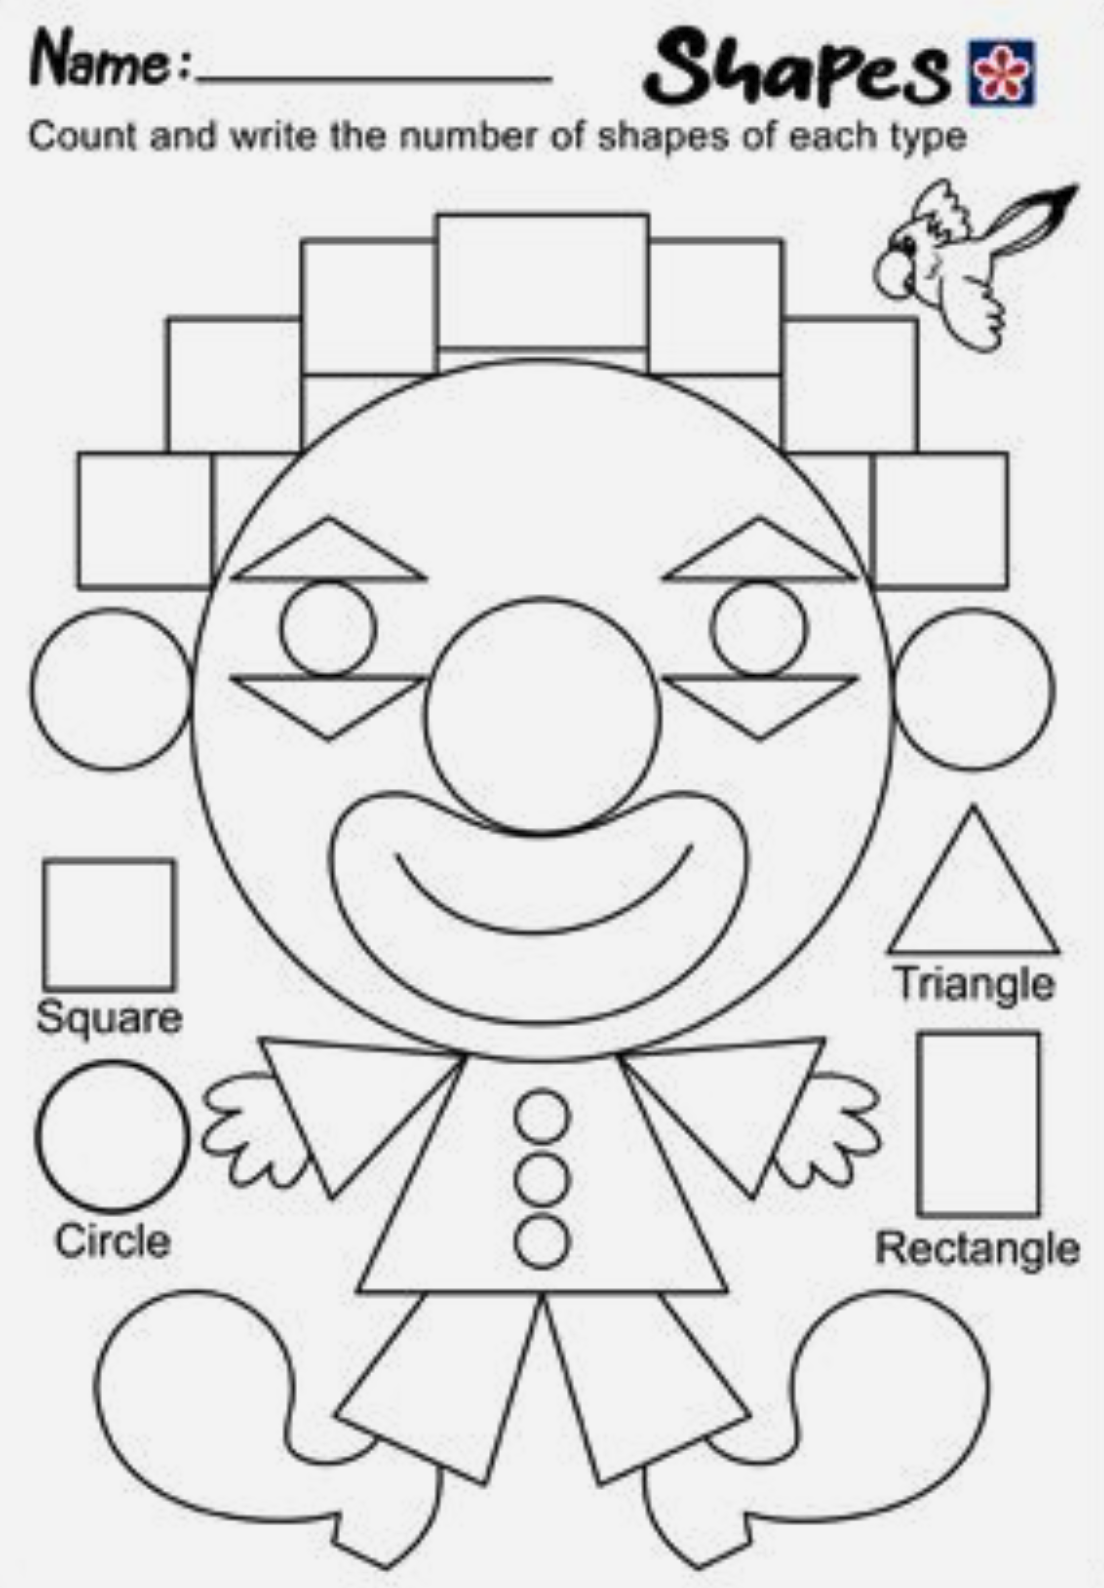

In [ ]:
## Lendo a imagem
imagem = cv2.imread('22.png')
cv2_imshow(imagem)

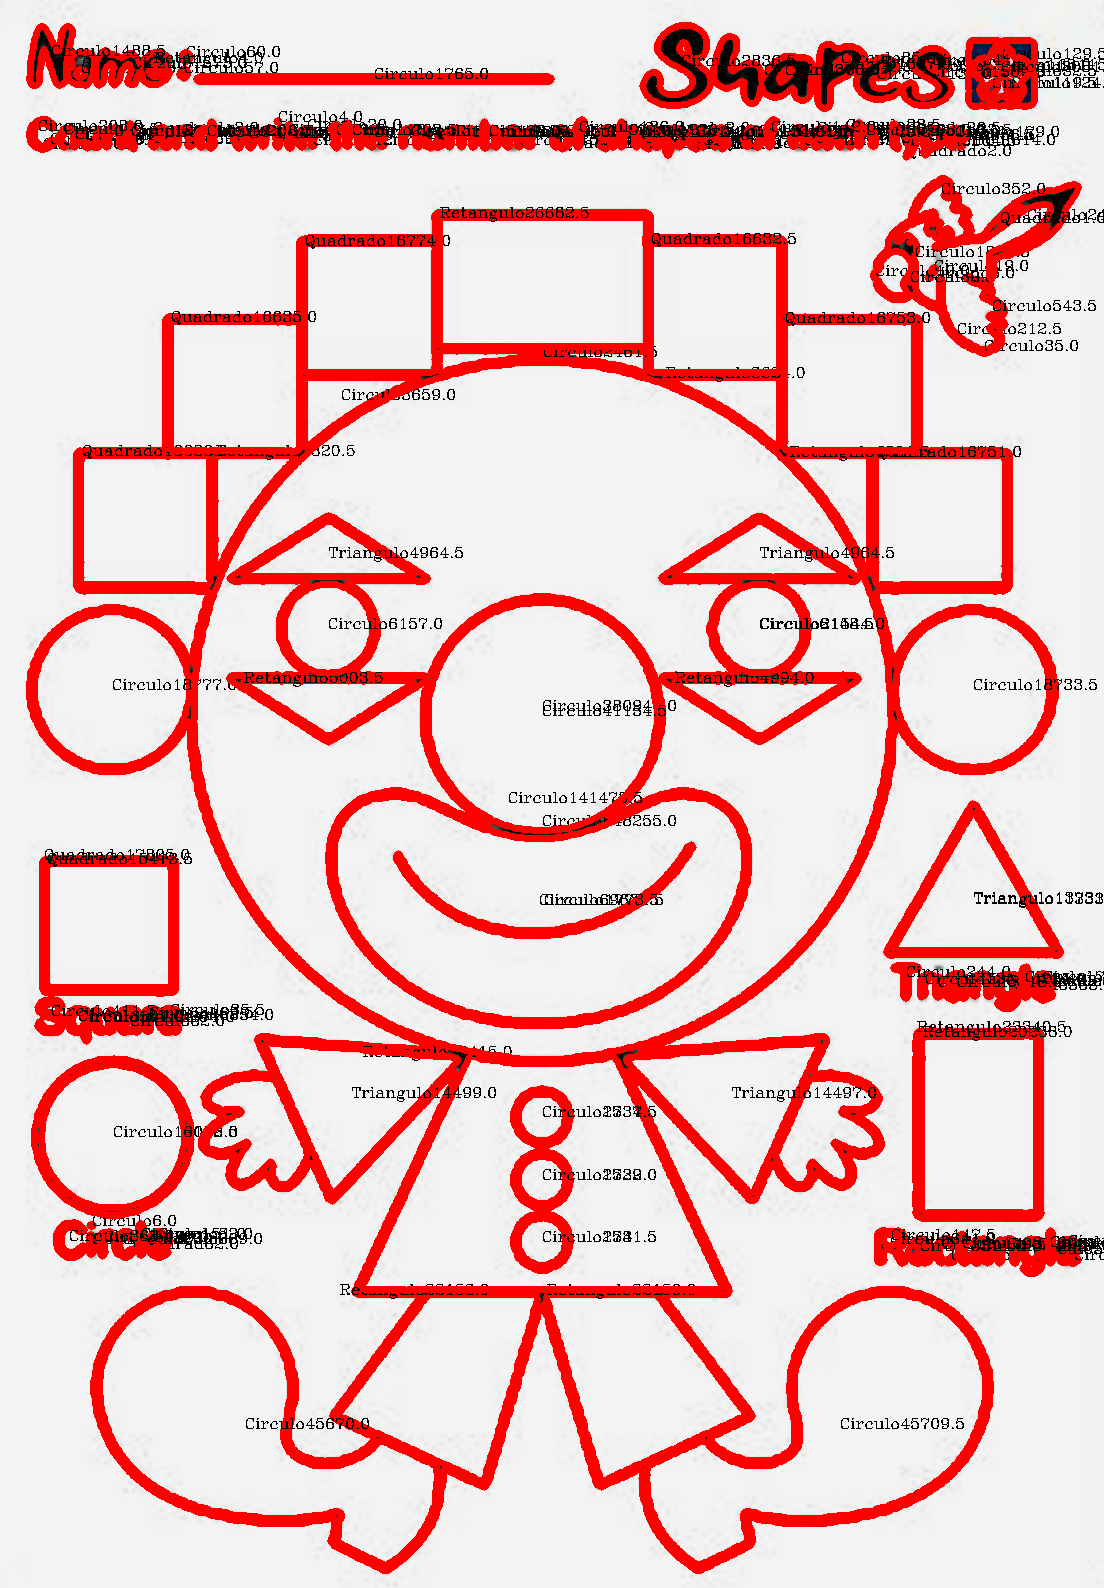

In [ ]:
# Convertendo a imagem para escala cinza
imagem_cinza = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY)
  
#  threshold da imagem cinza
_, threshold = cv2.threshold(imagem_cinza, 110, 255, cv2.THRESH_BINARY)
  
# Função cv2.findContours() com threshold
contours, _ = cv2.findContours(threshold, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
  
i = 0
  
# Para cada um dos contornos achados
for contour in contours:
  
    # Quando o contador é == 0, consideramos a própria imagem como uma forma, assim é preciso acrescentar 1 ao contador
    if i == 0:
        i = 1
        continue
  
    # Função cv2.approxPloyDP() para aproximar a forma
    approx = cv2.approxPolyDP(contour, 0.01 * cv2.arcLength(contour, True), True)
      
    # Função drawContours() para desenhar os contornos
    cv2.drawContours(imagem, [contour], 0, (0, 0, 255), 5)
  
    # Achando o centro de cada forma
    # M['m00'] é a área
    M = cv2.moments(contour)
    if M['m00'] != 0.0:
        x = int(M['m10']/M['m00']) 
        y = int(M['m01']/M['m00'])

    if len(approx) == 3: # Se é um triângulo
        cv2.putText(imagem, ("Triangulo" + str(M['m00'])), (x, y), cv2.FONT_HERSHEY_COMPLEX, 0.5, (0, 0, 0))
    elif len(approx) == 4: # Se é um quadrilatero
        (x, y , w, h) = cv2.boundingRect(approx)
        aspectRatio = float(w)/h
        if (aspectRatio >= 0.95 and aspectRatio < 1.05): # Se é um quadrado
            cv2.putText(imagem, ("Quadrado" + str(M['m00'])), (x, y), cv2.FONT_HERSHEY_COMPLEX, 0.5, (0, 0, 0))
        else: # Se é um retângulo
            cv2.putText(imagem, ("Retangulo" + str(M['m00'])), (x, y), cv2.FONT_HERSHEY_COMPLEX, 0.5, (0, 0, 0))
    else: # Se é um círculo 
        cv2.putText(imagem, ("Circulo" + str(M['m00'])), (x, y), cv2.FONT_HERSHEY_COMPLEX, 0.5, (0, 0, 0))

cv2_imshow(imagem)
cv2.waitKey(0)
cv2.destroyAllWindows()